<h1><center><u> Convolutional Neural Network model on CIFAR-10 dataset</u></center></h1>

In this notebook, I am going to classify images from the CIFAR-10 dataset. The dataset consists of airplanes, dogs, cats, and other objects. Here, preprocess the images then train a convolutional neural network on all the samples. The images need to be normalized and the labeled.

## **Understanding the dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Understanding the original labels
The label data is just a list of 10000 numbers in the range 0-9, which corresponds to each of the 10 classes in CIFAR-10.

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

### **Convolution**

Convolution is an orderly procedure where two sources of information are intertwined; it’s an operation that changes a function into something else. Convolutions have been used for a long time typically in image processing to blur and sharpen images, but also to perform other operations. (e.g. enhance edges and emboss) CNNs enforce a local connectivity pattern between neurons of adjacent layers.

CNNs make use of filters (also known as kernels), to detect what features, such as edges, are present throughout an image. There are four main operations in a CNN:  

* Convolution

* Non Linearity (ReLU)

* Pooling or Sub Sampling

* Classification (Fully Connected Layer)

The first layer of a Convolutional Neural Network is always a Convolutional Layer. Convolutional layers apply a convolution operation to the input, passing the result to the next layer. A convolution converts all the pixels in its receptive field into a single value. For example, if you would apply a convolution to an image, you will be decreasing the image size as well as bringing all the information in the field together into a single pixel. The final output of the convolutional layer is a vector. Based on the type of problem we need to solve and on the kind of features we are looking to learn, we can use different kinds of convolutions.

**The 2D Convolution Layer**

The most common type of convolution that is used is the 2D convolution layer and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel. The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features.

**The Dilated or Atrous Convolution**
This operation expands window size without increasing the number of weights by inserting zero-values into convolution kernels. Dilated or Atrous Convolutions can be used in real time applications and in applications where the processing power is less as the RAM requirements are less intensive.

**Separable Convolutions**

There are two main types of separable convolutions: spatial separable convolutions, and depthwise separable convolutions. The spatial separable convolution deals primarily with the spatial dimensions of an image and kernel: the width and the height. Compared to spatial separable convolutions, depthwise separable convolutions work with kernels that cannot be “factored” into two smaller kernels. As a result, it is more frequently used.

**Transposed Convolutions**

These types of comvolutions are also known as deconvolutions or fractionally strided convolutions. A transposed convolutional layer carries out a regular convolution but reverts its spatial transformation.  

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# **Data**
CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

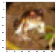

In [7]:
# FROG
plt.figure(figsize = (6,4),dpi = 16 )
plt.imshow(x_train[0])

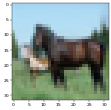

In [8]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

Normalize the images to a number from 0 to 1. Image has 3 channels and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# **PreProcessing**

In [9]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
x_train.max()

255

**Data Normalization**

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

In [12]:
# Normalizing the training data
x_train = x_train/255

In [13]:
# Normalizing the training data
x_test = x_test/255

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test.shape

(10000, 32, 32, 3)

# **Label**

In [16]:
from tensorflow.keras.utils import to_categorical

Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

**to_categorical function**
Converts a class vector (integers) to binary class matrix. E.g. for use with categorical_crossentropy . Arguments. y: Array-like with class values to be converted into a matrix (integers from 0 to num_classes - 1 ).

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [19]:
y_cat_train = to_categorical(y_train, 10)

In [20]:
y_cat_train.shape

(50000, 10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test, 10)

In [23]:
y_cat_test.shape

(10000, 10)

In [24]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Building the Model**

In [25]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

A **Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Schematically, the following Sequential model:

In [26]:
model = Sequential()

**The first hidden layer**
**The hidden layers** of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. Here it simply means that instead of using the normal activation functions defined above, convolution and pooling functions are used as activation functions.

**Dense Layer** is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

## **Activation function**
**The activation function** compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It's disabled if the input value is less than the threshold value, which means its output isn't sent on to the next or hidden layer.

**Why do we need activation functions?**
 
An activation function determines if a neuron should be activated or not activated. This implies that it will use some simple mathematical operations to determine if the neuron’s input to the network is relevant or not relevant in the prediction process.

The ability to introduce non-linearity to an artificial neural network and generate output from a collection of input values fed to a layer is the purpose of the activation function.

**Types of Activation functions**
 
Activation functions can be divided into three types:

* Linear Activation Function
* Binary Step Function
* Non-linear Activation Functions

**Linear Activation Function**
 
The linear activation function, often called the identity activation function, is proportional to the input. The range of the linear activation function will be (-∞ to ∞). The linear activation function simply adds up the weighted total of the inputs and returns the result

**Binary Step Activation Function**
 
A threshold value determines whether a neuron should be activated or not activated in a binary step activation function.

The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It’s disabled if the input value is less than the threshold value, which means its output isn’t sent on to the next or hidden layer.

**Non-linear Activation Functions**
 
The non-linear activation functions are the most-used activation functions. They make it uncomplicated for an artificial neural network model to adapt to a variety of data and to differentiate between the outputs.

Non-linear activation functions allow the stacking of multiple layers of neurons, as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation output in a neural network.

These activation functions are mainly divided basis on their range and curves. The remainder of this article will outline the major non-linear activiation functions used in neural networks.

**1. Sigmoid**
 
Sigmoid accepts a number as input and returns a number between 0 and 1. It’s simple to use and has all the desirable qualities of activation functions: nonlinearity, continuous differentiation, monotonicity, and a set output range.

$$
  f(x) = \frac{1}{1\ –\ e^{-x}}
$$

Where “$n$” is the value of the hidden layer node, the same as the first equation above. This transfer function allows the output to model non-linear system behavior, which most real-world problems will exhibit
This is mainly used in binary classification problems. This sigmoid function gives the probability of an existence of a particular class.

**2.TanH (Hyperbolic Tangent)**
 
TanH compress a real-valued number to the range [-1, 1]. It’s non-linear, But it’s different from Sigmoid,and its output is zero-centered. The main advantage of this is that the negative inputs will be mapped strongly to the negative and zero inputs will be mapped to almost zero in the graph of TanH.

**3.ReLU (Rectified Linear Unit)**
 
ReLU stands for Rectified Linear Unit and is one of the most commonly used activation function in the applications. It’s solved the problem of vanishing gradient because the maximum value of the gradient of ReLU function is one. It also solved the problem of saturating neuron, since the slope is never zero for ReLU function. The range of ReLU is between 0 and infinity.

**4.Leaky ReLU**
 
Leaky ReLU is an upgraded version of the ReLU activation function to solve the dying ReLU problem, as it has a small positive slope in the negative area. But, the consistency of the benefit across tasks is presently ambiguous.

**5. Softmax**
 
A combination of many sigmoids is referred to as the Softmax function. It determines relative probability. Similar to the sigmoid activation function, the Softmax function returns the probability of each class/labels. In multi-class classification, softmax activation function is most commonly used for the last layer of the neural network.

The softmax function gives the probability of the current class with respect to others. This means that it also considers the possibility of other classes too.

**Important Considerations on Activation function**
 
While choosing the proper activation function, the following problems and issues must be considered:

*Vanishing gradient** is a common problem encountered during neural network training. Like a sigmoid activation function, some activation functions have a small output range (0 to 1). So a huge change in the input of the sigmoid activation function will create a small modification in the output. Therefore, the derivative also becomes small. These activation functions are only used for shallow networks with only a few layers. When these activation functions are applied to a multi-layer network, the gradient may become too small for expected training.

**Exploding gradients** are situations in which massive incorrect gradients build during training, resulting in huge updates to neural network model weights. When there are exploding gradients, an unstable network might form, and training cannot be completed. Due to exploding gradients, the weights’ values can potentially grow to the point where they overflow, resulting in loss in NaN values.

In [27]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


**Keras Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

**Kernel** In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

**filters:** Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

**kernel_size:** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

**strides:** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

**padding:** one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

**groups:** A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.

**use_bias:** Boolean, whether the layer uses a bias vector.
kernel_initializer: Initializer for the kernel weights matrix (see keras.initializers). Defaults to 'glorot_uniform'.

**bias_initializer:** Initializer for the bias vector (see keras.initializers). Defaults to 'zeros'.

**kernel_regularizer:** Regularizer function applied to the kernel weights matrix (see keras.regularizers).

**bias_regularizer:** Regularizer function applied to the bias vector (see keras.regularizers).

**activity_regularizer:** Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).

**kernel_constraint:** Constraint function applied to the kernel matrix (see keras.constraints).

**bias_constraint:** Constraint function applied to the bias vector (see keras.constraints).

In [28]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

The purpose of the **pooling layers** is to reduce the dimensions of the hidden layer by combining the outputs of neuron clusters at the previous layer into a single neuron in the next layer.

**pool_size:** integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.

In [29]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

In [30]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [31]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

**Flatten** is a table function that takes a VARIANT, OBJECT, or ARRAY column and produces a lateral view (i.e. an inline view that contains correlation referring to other tables that precede it in the FROM clause). FLATTEN can be used to convert semi-structured data to a relational representation.

In [32]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

In [33]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

## **Compiling the model**

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

**Categorical crossentropy** is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions.

**A metric** is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.

In [34]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

**EarlyStopping** class
Stop training when a monitored metric has stopped improving. Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss' , and mode would be 'min' .

**patience:** Number of epochs with no improvement after which training will be stopped.

**monitor:** Quantity to be monitored.

**min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

**verbose:** Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

**mode:** One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

**baseline:** Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

**restore_best_weights:** Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.


In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [38]:
model.fit(x_train, y_cat_train, epochs = 4, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/4
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5109 - accuracy: 0.4574 - val_loss: 1.3543 - val_accuracy: 0.5207
Epoch 2/4
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1530 - accuracy: 0.5954 - val_loss: 1.0826 - val_accuracy: 0.6203
Epoch 3/4
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0038 - accuracy: 0.6512 - val_loss: 1.1729 - val_accuracy: 0.6139
Epoch 4/4
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9041 - accuracy: 0.6881 - val_loss: 1.0063 - val_accuracy: 0.6599


In [39]:
model.save('cifar_10epochs.h5')

In [40]:
losses = pd.DataFrame(model.history.history)

In [41]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.510882,0.45738,1.354268,0.5207
1,1.152965,0.59542,1.082562,0.6203
2,1.003771,0.65124,1.172900,0.6139
3,0.904101,0.68812,1.006297,0.6599


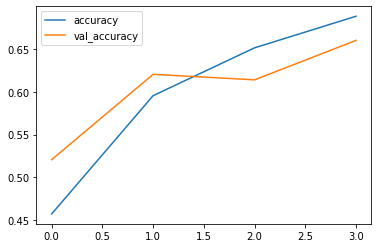

In [42]:
losses[['accuracy','val_accuracy']].plot();

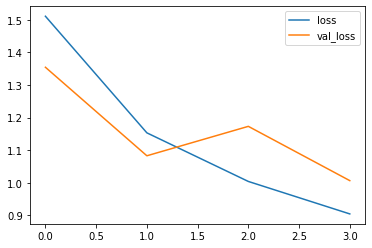

In [43]:
losses[['loss','val_loss']].plot();

Firstly we need to make proper layer in say sequential neural network as if before training the model if done the layering for doing the particular job we can easily use **metrics_names** as after the fit function or transform function can be used.

In [44]:
model.metrics_names

['loss', 'accuracy']

The **accuracy and loss** displayed in the progress bar are a exponentially average over batches, as to ease visualization. The loss and accuracy you get as return from **model.evaluate** is the total loss/accuracy averaged over batches, and are the numbers you should consider as final and correct.

In [45]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[1.0062965154647827, 0.6599000096321106]


Here the model accuracy is 0.6599
and loss is 1.00629

The **numpy.argmax()** function returns indices of the max element of the array in a particular axis. 

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 11ms/step


**A Classification report** is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below. The report is copied from our previous post related to K-Means on Iris Dataset.

In [47]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.78      0.80      0.79      1000
           2       0.60      0.52      0.56      1000
           3       0.52      0.45      0.48      1000
           4       0.68      0.45      0.54      1000
           5       0.52      0.63      0.57      1000
           6       0.56      0.88      0.68      1000
           7       0.73      0.69      0.71      1000
           8       0.85      0.70      0.77      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.

In [48]:
confusion_matrix(y_test,predict_classes)

array([[705,  33,  69,  30,  14,  15,  33,  11,  45,  45],
       [ 24, 797,   3,  13,   7,   6,  31,   6,  14,  99],
       [ 54,  11, 517,  56,  63, 120, 124,  35,   7,  13],
       [ 13,  16,  52, 449,  33, 224, 154,  35,  10,  14],
       [ 26,   7,  84,  76, 454,  62, 176,  91,  16,   8],
       [  5,   6,  53, 114,  29, 632,  90,  51,   7,  13],
       [  3,   9,  27,  41,  10,  22, 875,   5,   1,   7],
       [ 17,   4,  23,  54,  48, 107,  28, 691,   4,  24],
       [111,  47,  19,  22,   8,  14,  20,   7, 698,  54],
       [ 32,  88,   9,  15,   1,   7,  32,  18,  17, 781]])

**A confusion matrix** is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

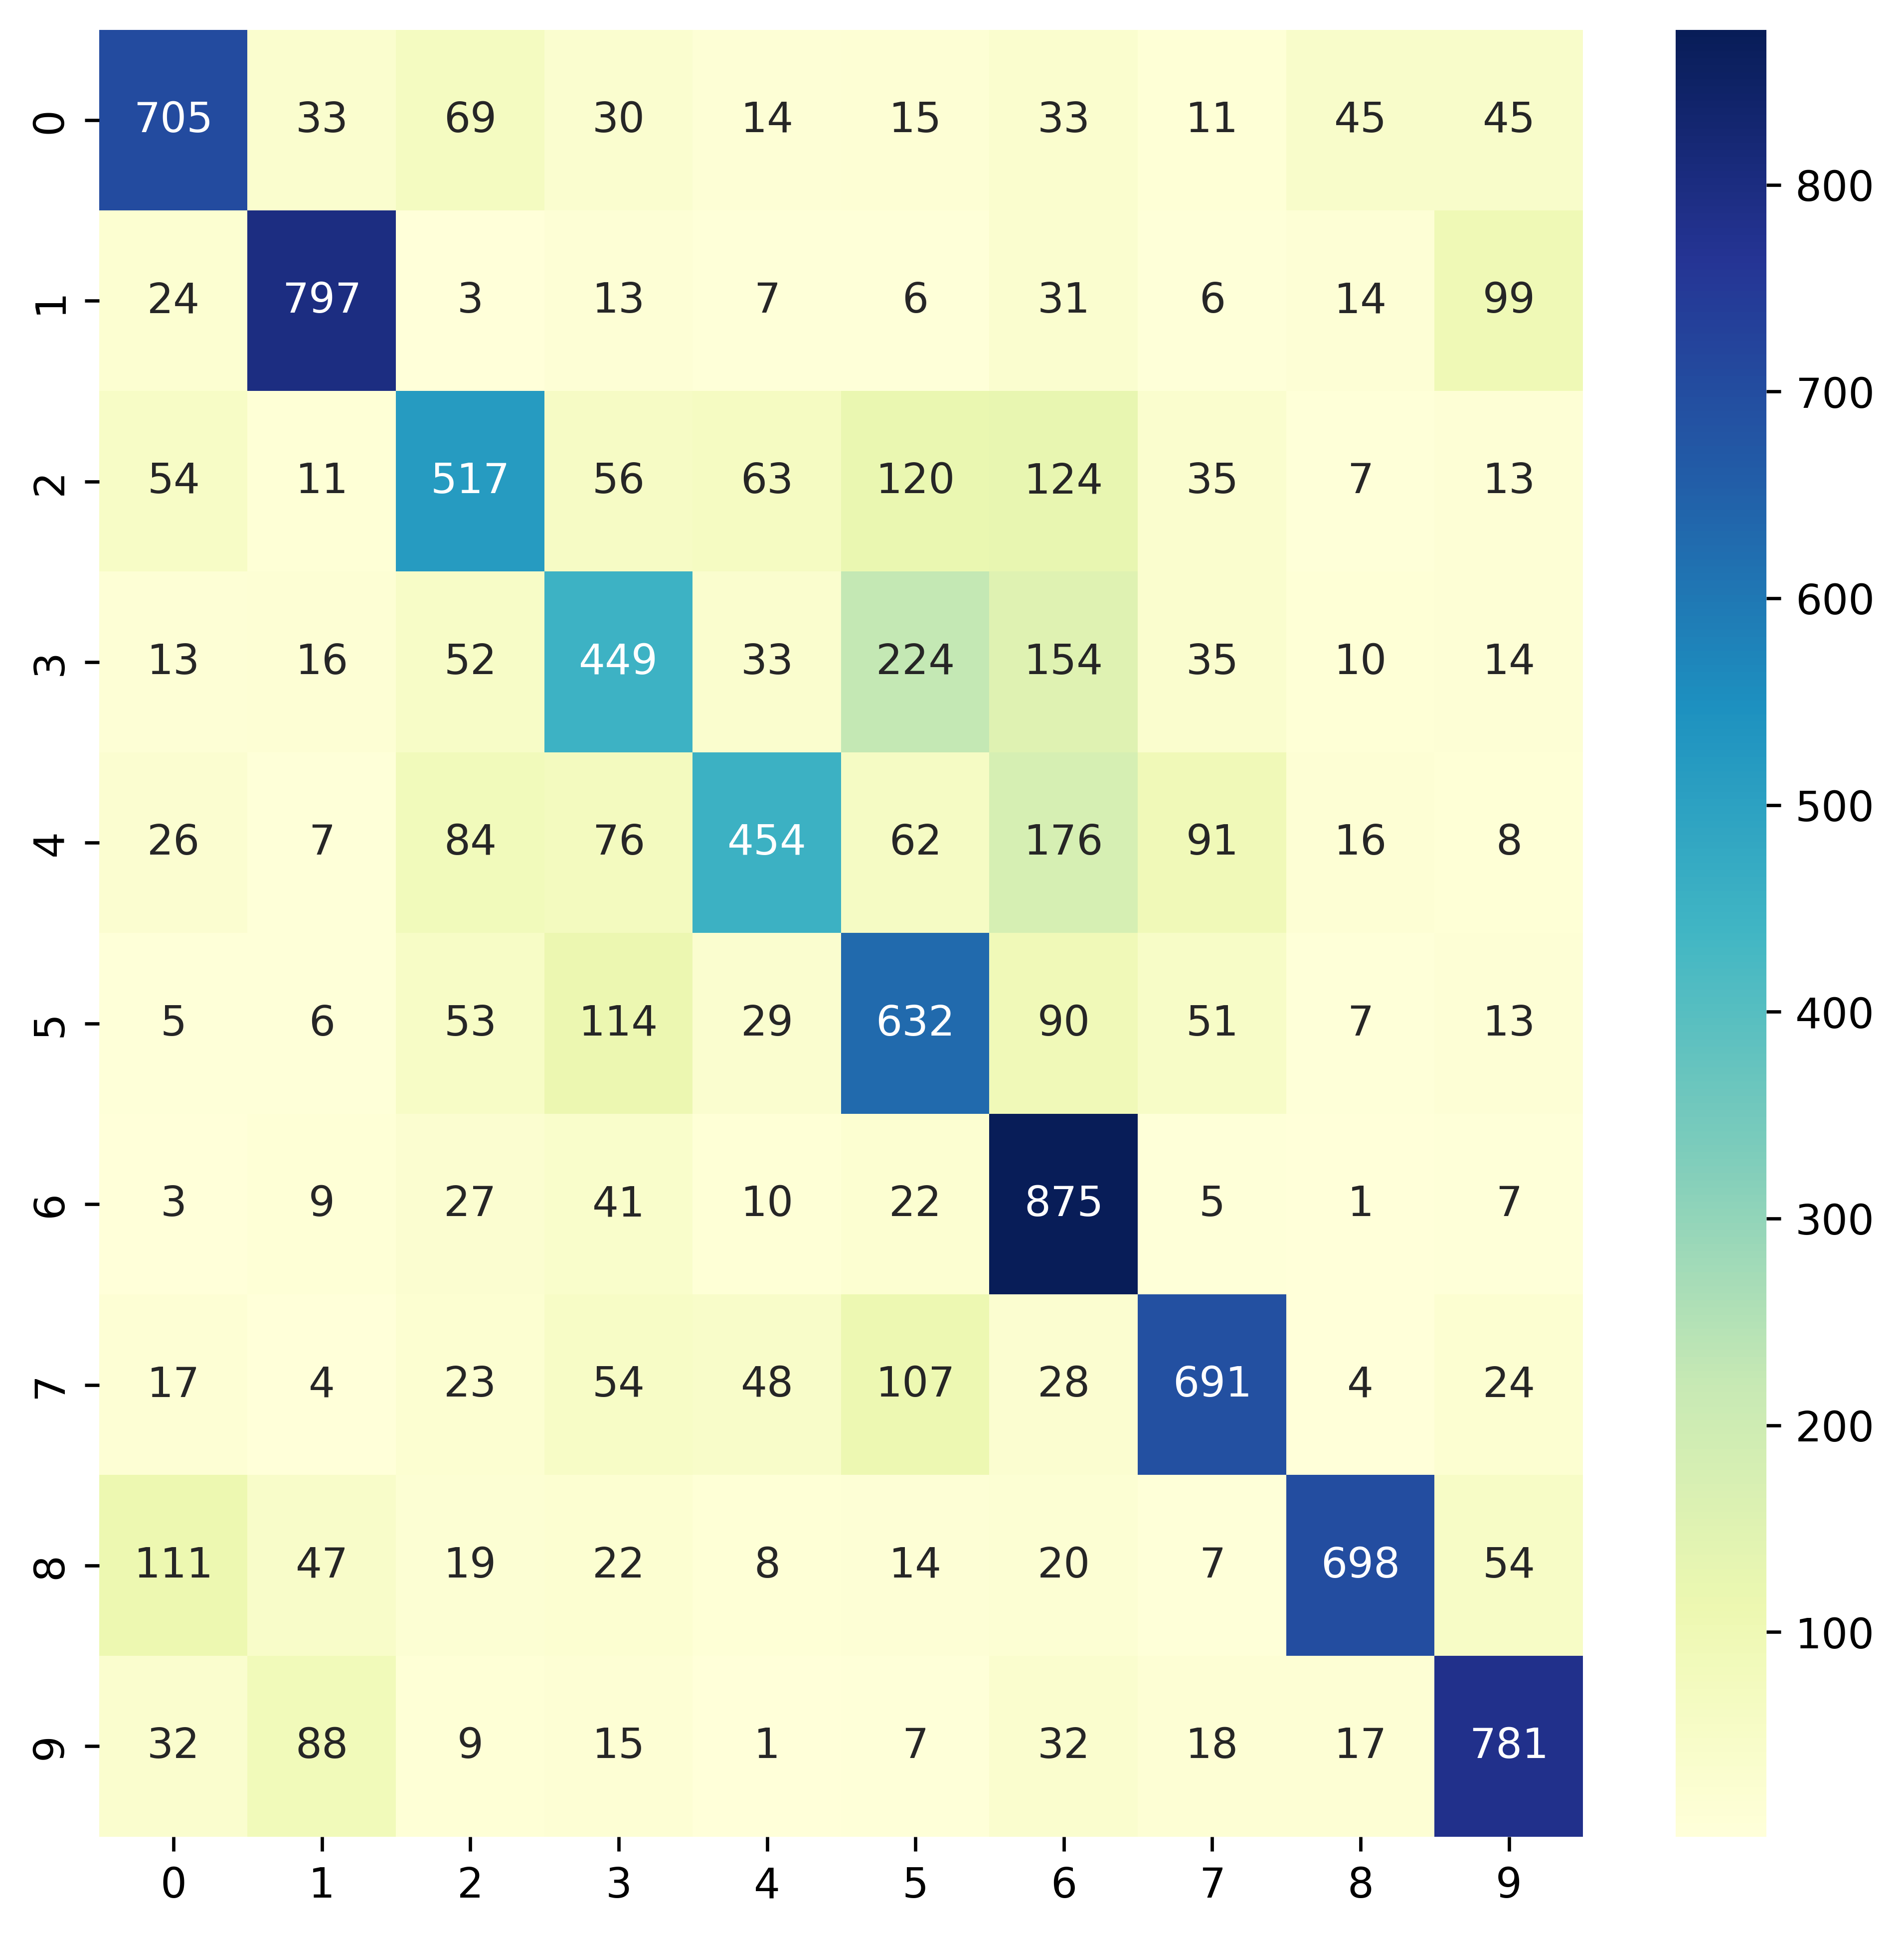

In [49]:
import seaborn as sns
plt.figure(figsize=(8,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Here, We can see that through Confusion Matrix of it gives information about errors made by the classifier and the types of errors that are being made. 

# **Predicting a given image**

Let's look at the 10th and 17th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels. The number gives the percentage for the predicted label.
with the model trained, we can use it to make predictions about some images.


In [50]:
my_image = x_test[10]

The **imshow()** function in pyplot module of matplotlib library is used to display data as an image

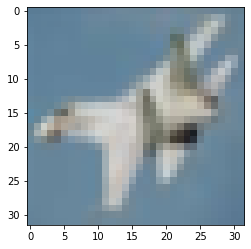

In [51]:
plt.imshow(my_image)

In [52]:
my_image = x_test[17]

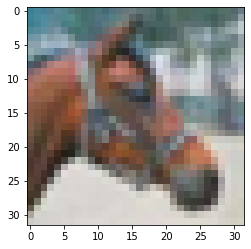

In [53]:
plt.imshow(my_image)

In the below printoptions code displays a one-element numpy.ndarray, then the element. The formatter is used for the array, not for the element alone:

In [54]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)

# predict function of the model
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 20ms/step


array([[0.003738, 0.001423, 0.070389, 0.140722, 0.033703, 0.270708,
        0.007937, 0.403073, 0.000627, 0.067679]], dtype=float32)

Since, its clearly shows that our model is predicted correctly.
Therefore, the model is fitted well after four epoch.



#### **<h1><center><u>THANK YOU!</u></center></h1>**